In [1]:
%matplotlib inline
import sys,os
import numpy
import matplotlib.pyplot as plt

In [2]:
import gillespy
class ToggleSwitch(gillespy.Model):
    """ Gardner et al. Nature (1999)
    'Construction of a genetic toggle switch in Escherichia coli'
    """
    def __init__(self, parameter_values=None):
        # Initialize the model.
        gillespy.Model.__init__(self, name="toggle_switch")
        # Parameters
        alpha1 = gillespy.Parameter(name='alpha1', expression=1)
        alpha2 = gillespy.Parameter(name='alpha2', expression=1)
        beta = gillespy.Parameter(name='beta', expression="2.0")
        gamma = gillespy.Parameter(name='gamma', expression="2.0")
        mu = gillespy.Parameter(name='mu', expression=1.0)
        self.add_parameter([alpha1, alpha2, beta, gamma, mu])

        # Species
        U = gillespy.Species(name='U', initial_value=10)
        V = gillespy.Species(name='V', initial_value=10)
        self.add_species([U, V])

        # Reactions
        cu = gillespy.Reaction(name="r1",reactants={}, products={U:1},
                propensity_function="alpha1/(1+pow(V,beta))")
        cv = gillespy.Reaction(name="r2",reactants={}, products={V:1},
                propensity_function="alpha2/(1+pow(U,gamma))")
        du = gillespy.Reaction(name="r3",reactants={U:1}, products={},
                rate=mu)
        dv = gillespy.Reaction(name="r4",reactants={V:1}, products={},
                rate=mu)
        self.add_reaction([cu,cv,du,dv])
        self.timespan(numpy.linspace(0,100,101))

/usr/local/lib/python2.7/dist-packages/scipy/__init__.py:111: UserWarning: Numpy 1.6.2 or above is recommended for this version of scipy (detected version 1.6.1)
  UserWarning)


In [3]:
model = ToggleSwitch()

In [4]:
results = model.run()

In [5]:
dresults = model.run(solver=gillespy.StochKitODESolver)

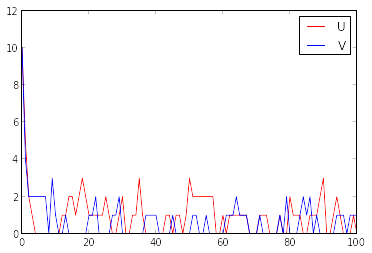

In [6]:
plt.plot(results[0][:,0],results[0][:,1],'-r', label='U')
plt.plot(results[0][:,0],results[0][:,2],'-b', label='V')
plt.plot([0],[11])
plt.legend(loc='best')

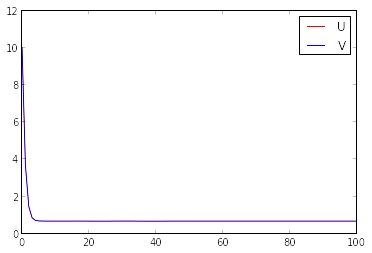

In [7]:
plt.plot(dresults[0][:,0],dresults[0][:,1],'-r', label='U')
plt.plot(dresults[0][:,0],dresults[0][:,2],'-b', label='V')
plt.plot([0],[11])
plt.legend(loc='best')